In [ ]:
from IPython.display import display, HTML
display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [ ]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # CUDA가 아닌 경우에도 GPU를 숨김 효과

import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # 학습과정 loss, acc 시작화
# quiz에서는 scale 조정, train_test_split 등을 추가

# print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# 1. 데이터셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
plt_row = 3
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

# # axes[0,0].imshow(X_test[0].reshape(width, height))
# axes[0,0].imshow(X_test[0])
# axes[0,0].axis('off')
# title='실재:{}'.format(y_test[0])
# axes[0,0].set_title(title)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(plt_row*plt_col):
    subax = axes[i//plt_col, i%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='실제:{}'.format(y_test[i])
    subax.set_title(title)


# 1. DNN

In [ ]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_val = X_train[50000:]
y_val = y_train[50000:]

X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28, 28) → 784 1차원 → 실수형변환 → 스케일 조정

X_train = X_train.reshape(-1, width*height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width*height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width*height).astype('float32') / 255.0
# 타켓변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val= to_categorical(y_val)
Y_test = to_categorical(y_test)


X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax'),
])

model.summary()


# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
with tf.device('/CPU:0'):
    hist = model.fit(X_train, Y_train,
                    epochs=50,
                    validation_data=(X_val, Y_val),
                    verbose=1)


In [ ]:
# 그래프
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()


In [ ]:
model.save('./model/mnlist_dnn.h5')

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print('실제값 :', y_test)
print('실제값 :', np.argmax(Y_test, axis=1))

yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

In [ ]:
# 실재값과 예측값이 다른 갯수(방법1)
cnt = 0

for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i != j:
            cnt += data

print('예측이 틀린 갯수 :', cnt)

In [ ]:
# 실재값과 예측값이 다른 갯수(방법2)
cnt = 0

for y, h in zip(y_test, yhat):
    print(y, h)
    if y != h:
        cnt += 1

print('예측이 틀린 갯수 :', cnt)

In [ ]:
# CNN 을 사용하여, 에측이 틀린 데이터 출력(yhat과 y_test가 다른 겻들 172개)
plt_row = 18
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col+10, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

plt.subplots_adjust(hspace=0.4, wspace=1)

# for i in range(plt_row*plt_col):
i = 0 # yhat과 y_test의 index → yhat[i], y_test[i]를 비교.
cnt = 0 # 이미지 출력횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue

    subax = axes[cnt//plt_col, cnt%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='y:{} / h:{} ({})'.format(y_test[i], yhat[i], i)

    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가

# CNN (컨볼루션 레이어 포함) - 교안 31 page

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets  import mnist
from tensorflow.keras.utils     import to_categorical
from tensorflow.keras.models    import Sequential, save_model, load_model
from tensorflow.keras.layers    import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

################
# 맥북에서 추가 부분
################
from tensorflow.keras import mixed_precision
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001, clipnorm=1.0)  # 또는 clipvalue=1.0
mixed_precision.set_global_policy('float32')  # 안정성 보장
################


In [43]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_val = X_train[50000:]
y_val = y_train[50000:]

X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28, 28) → 784 1차원 → 실수형변환 → 스케일 조정

X_train = X_train.reshape(-1, width, height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width, height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width, height).astype('float32') / 255.0
# 타켓변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val= to_categorical(y_val)
Y_test = to_categorical(y_test)


X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

CPU times: user 161 ms, sys: 34 ms, total: 195 ms
Wall time: 196 ms


((50000, 28, 28),
 (50000, 10),
 (10000, 28, 28),
 (10000, 10),
 (10000, 28, 28),
 (10000, 10))

In [ ]:
# 2. 모델생성
model = Sequential()

model.add(Conv2D(
    filters = 32, # 핉터수
    kernel_size = 3, # 필터사이즈 kernel_size=(3, 3)
    padding = 'same', # zero-padding 을 하면 출력사이즈도 동일
    input_shape = (width, height, 1), # 입력채널 1개, 필더 32 → 28 * 28 * 32채널 출력
    activation = 'relu'
))

model.add(MaxPool2D(pool_size = (2, 2))) # → 14 * 14 * 32
model.add(Dropout(0.1))

model.add(Conv2D(
    filters = 64, # 핉터수
    kernel_size = (3, 3), # 필터사이즈 kernel_size=(3, 3)
    activation = 'relu' # → ((14 -3 + 1) * (14 -3 + 1)) * 64
)) 

model.add(MaxPool2D(pool_size = (2, 2))) # → 6 * 6
model.add(Dropout(0.25))

model.add(Flatten()) # 입력을 1차원으로 

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

################
# 맥북에서 추가 부분
################
model.add(Dense(units=10, activation='softmax', dtype='float32'))
################

model.summary()

# 320       = (3 * 3 필터가 weight 9 + 1(bias)) * 32 개 필터
# 18,496    = ((3 * 3 필터가 weight 3 * 3 * 32) + 1 (bias)) * 64 개 필터


/Users/teamkim/anaconda3/envs/ml-dl-nlp/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
%%time
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             
             ################
             # 맥북에서 추가 부분
             ################
             optimizer=opt,
             ################
             
             metrics=['accuracy'])
# 학습
early_stopping = EarlyStopping(patience=20)

hist = model.fit(X_train, Y_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_val, Y_val),
                callbacks=[early_stopping],
                verbose=1)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.7855 - loss: 0.7144 - val_accuracy: 0.9797 - val_loss: 0.0791
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9542 - loss: 0.1819 - val_accuracy: 0.9836 - val_loss: 0.0735
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9611 - loss: 0.1663 - val_accuracy: 0.9833 - val_loss: 0.0751
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9647 - loss: 0.1758 - val_accuracy: 0.9851 - val_loss: 0.0981
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9676 - loss: 0.2075 - val_accuracy: 0.9873 - val_loss: 0.0977
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9692 - loss: 0.2129 - val_accuracy: 0.9879 - val_loss: 0.1110
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9684 - loss: 0.2859 - val_accuracy: 0.9883 - val_loss: 0.1488
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9705 -

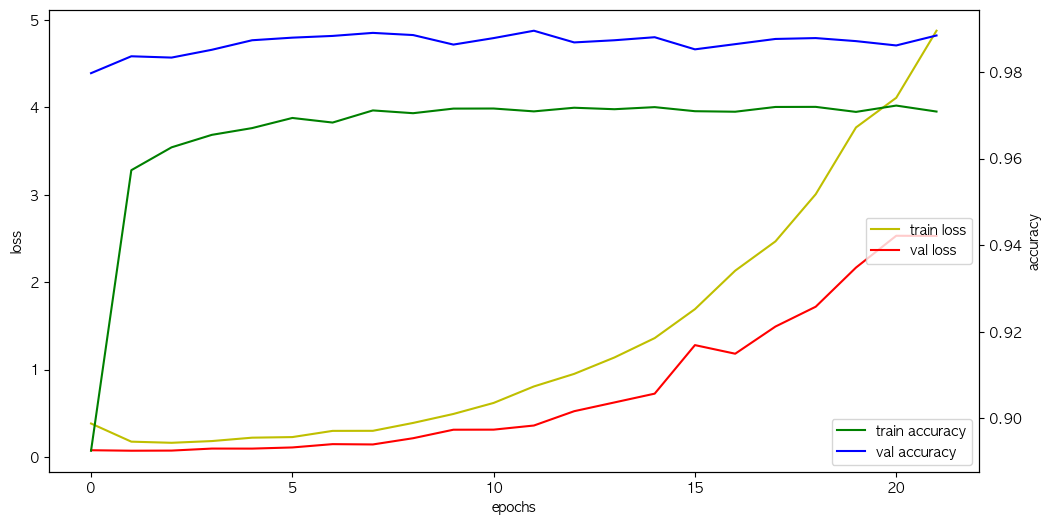

In [47]:
# 학습과정
# 그래프
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [48]:
# 모델 평가
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9848 - loss: 2.8972


[2.1910488605499268, 0.9883000254631042]

In [49]:
print('실제값 : ', y_test)
print('실제값 : ', Y_test.argmax(axis=1))

yhat = np.argmax(model.predict(X_test), axis=1)
print('예측값 : ', yhat)

실제값 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
예측값 :  [7 2 1 ... 4 5 6]


In [50]:
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

array([[ 977,    0,    0,    0,    0,    0,    1,    0,    1,    1],
       [   0, 1131,    2,    2,    0,    0,    0,    0,    0,    0],
       [   3,    1, 1024,    0,    1,    0,    0,    2,    1,    0],
       [   0,    0,    3, 1005,    0,    1,    0,    1,    0,    0],
       [   0,    1,    1,    0,  969,    0,    3,    0,    0,    8],
       [   2,    0,    0,    8,    0,  879,    2,    1,    0,    0],
       [   6,    2,    1,    0,    1,    8,  938,    0,    2,    0],
       [   0,    2,    7,    3,    0,    0,    0, 1013,    1,    2],
       [   6,    1,    2,    1,    0,    1,    0,    3,  956,    4],
       [   2,    3,    0,    3,    2,    2,    0,    4,    2,  991]])

In [51]:
# 실재값과 예측값이 다른 갯수(방법1)
cnt = 0

for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i != j:
            cnt += data

print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 117


In [52]:
# 실재값과 예측값이 다른 갯수(방법2)
cnt = 0

for y, h in zip(y_test, yhat):
    print(y, h)
    if y != h:
        cnt += 1

print('예측이 틀린 갯수 :', cnt)

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
4 4
7 7
2 2
7 7
1 1
2 2
1 1
1 1
7 7
4 4
2 2
3 3
5 5
1 1
2 2
4 4
4 4
6 6
3 3
5 5
5 5
6 6
0 0
4 4
1 1
9 9
5 5
7 7
8 8
9 9
3 3
7 7
4 4
6 6
4 4
3 3
0 0
7 7
0 0
2 2
9 9
1 1
7 7
3 3
2 2
9 9
7 7
7 7
6 6
2 2
7 7
8 8
4 4
7 7
3 3
6 6
1 1
3 3
6 6
9 9
3 3
1 1
4 4
1 1
7 7
6 6
9 9
6 6
0 0
5 5
4 4
9 9
9 9
2 2
1 1
9 9
4 4
8 8
7 7
3 3
9 9
7 7
4 4
4 4
4 4
9 9
2 2
5 5
4 4
7 7
6 6
7 7
9 9
0 0
5 5
8 8
5 5
6 6
6 6
5 5
7 7
8 8
1 1
0 0
1 1
6 6
4 4
6 6
7 7
3 3
1 1
7 7
1 1
8 8
2 2
0 0
2 2
9 9
9 9
5 5
5 5
1 1
5 5
6 6
0 0
3 3
4 4
4 4
6 6
5 5
4 4
6 6
5 5
4 4
5 5
1 1
4 4
4 4
7 7
2 2
3 3
2 2
7 7
1 1
8 8
1 1
8 8
1 1
8 8
5 5
0 0
8 8
9 9
2 2
5 5
0 0
1 1
1 1
1 1
0 0
9 9
0 0
3 3
1 1
6 6
4 4
2 2
3 3
6 6
1 1
1 1
1 1
3 3
9 9
5 5
2 2
9 9
4 4
5 5
9 9
3 3
9 9
0 0
3 3
6 6
5 5
5 5
7 7
2 2
2 2
7 7
1 1
2 2
8 8
4 4
1 1
7 7
3 3
3 3
8 8
8 8
7 7
9 9
2 2
2 2
4 4
1 1
5 5
9 9
8 8
7 7
2 2
3 3
0 0
4 4
4 4
2 2


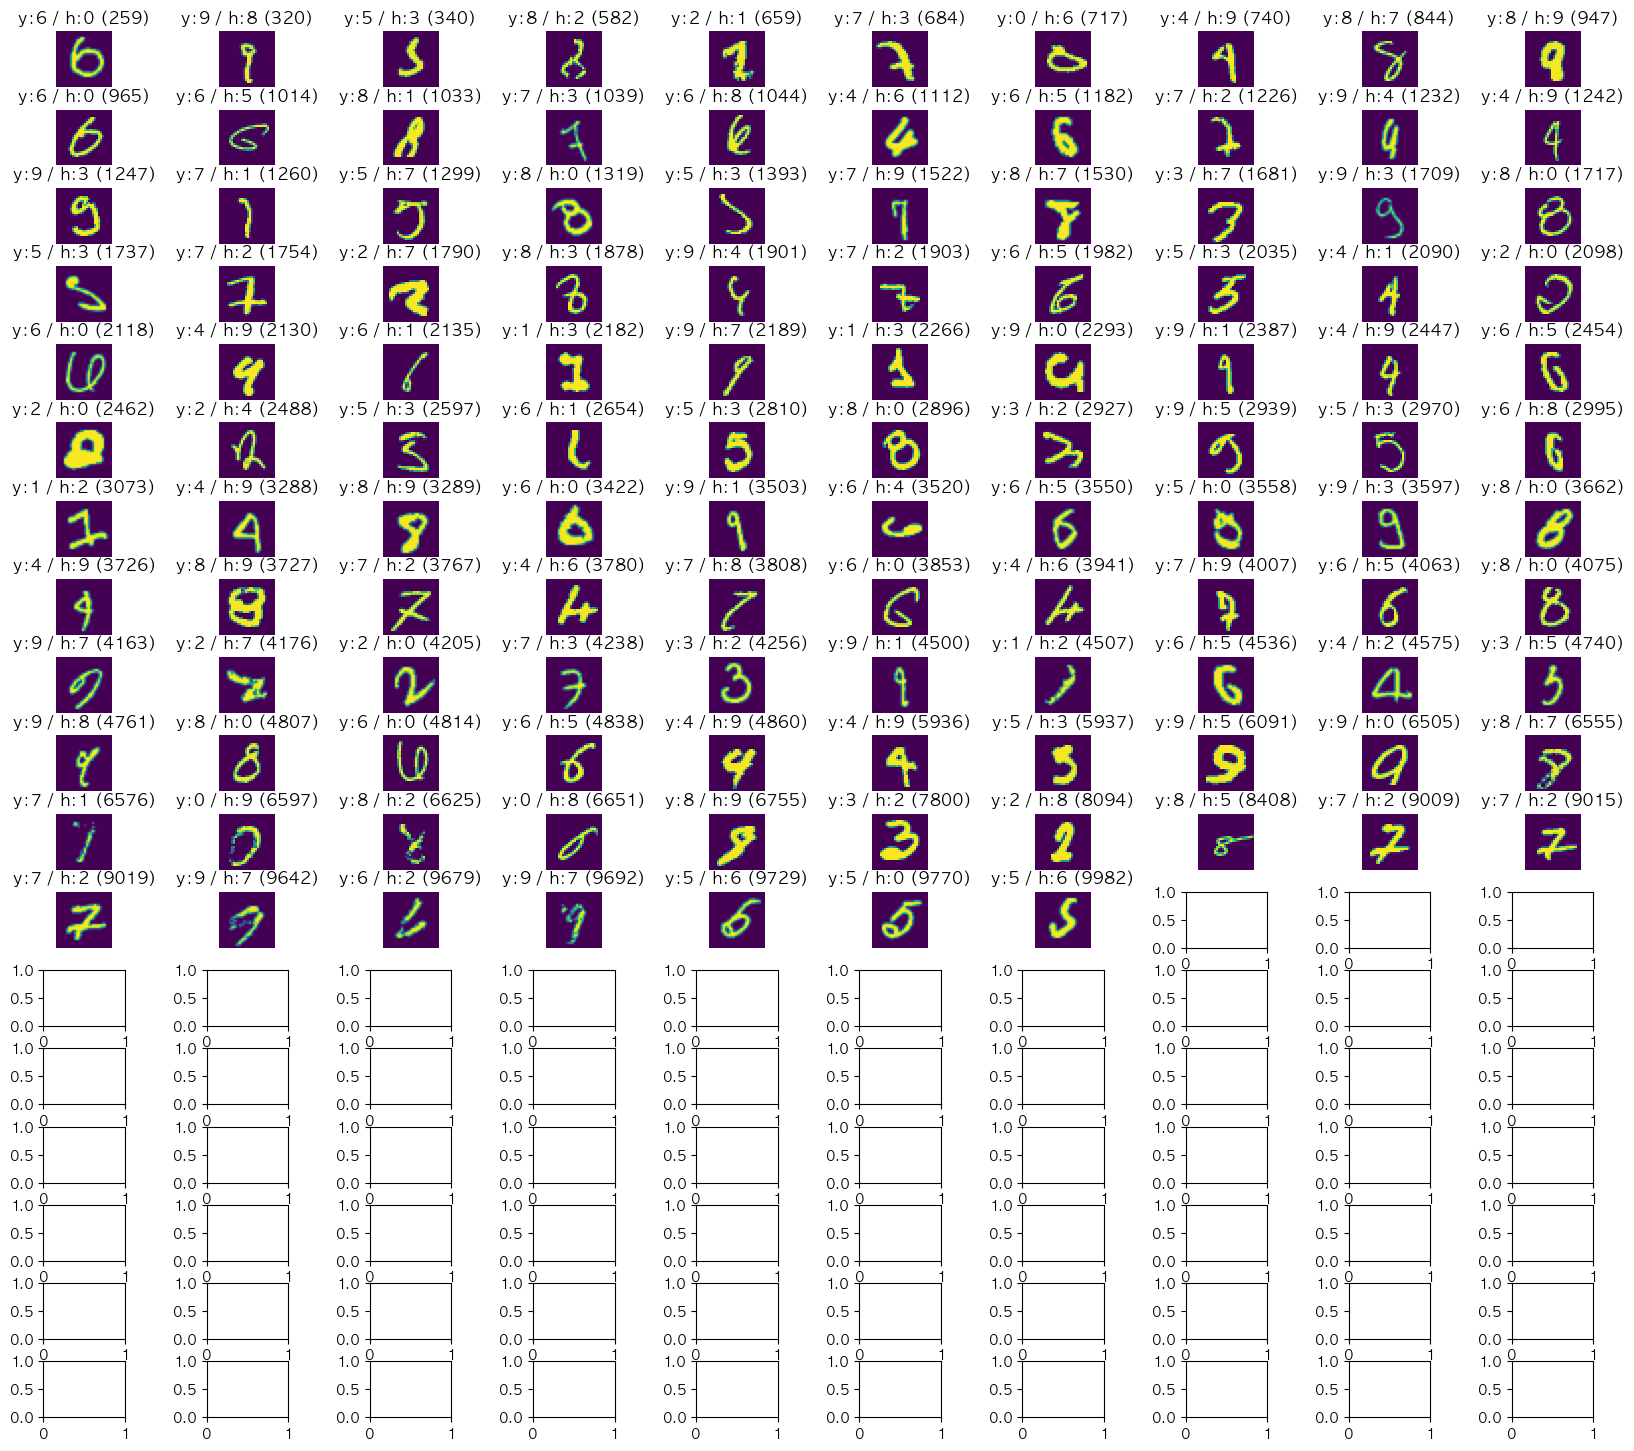

In [53]:
# CNN 을 사용하여, 에측이 틀린 데이터 출력(yhat과 y_test가 다른 겻들 172개)
plt_row = 18
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col+10, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

plt.subplots_adjust(hspace=0.4, wspace=1)

# for i in range(plt_row*plt_col):
i = 0 # yhat과 y_test의 index → yhat[i], y_test[i]를 비교.
cnt = 0 # 이미지 출력횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue

    subax = axes[cnt//plt_col, cnt%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='y:{} / h:{} ({})'.format(y_test[i], yhat[i], i)

    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가